# Multi Layer Perceptron (MLP)

L'objectif de ce notebook est d'étudier d’étudier les réseaux de neurones artificiel de type  **perceptron multicouches (MultiLayer Perceptron - MLP)**. Il généralise le perceptron afin d'apprendre des modèles plus complexes c'est-à-dire non linéaires.

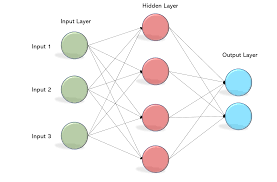

Après avoir défini les notions de bases d'un MLP, nous allons :
1. nous intéresser à l'apprentissage des fonctions booléennes **AND, OR et XOR** par un MLP
2. faire de la classification des images du dataset **MNIST** (chiffres manuscrits) à partir d'un MLP


## 1. Définitions

1. Définir la structure d'un MLP (forme, paramètres à ajuste,...)

    - Input layer
    - Hidden layer
    - Output layer

2. Définir la fonction d'activation. Donner des exemples

La fonction d'activation est une fonction mathématique appliquée à un signal en sortie d'un neurone artificiel. Le terme de "fonction d'activation" vient de l'équivalent biologique "potentiel d'activation", seuil de stimulation qui, une fois atteint entraîne une réponse du neurone. La fonction d'activation est souvent une fonction non-linéaire. Un exemple de fonction d'activation est la fonction de Heaviside, qui renvoie tout le temps 1 si le signal en entrée est positif, ou 0 s'il est négatif. 
    - Sigmoîde
    - Relu
    - Rampe
    - Hyperbolique
    - Softmax
    - etc..

3. Définir la forward propagation et la back propagation

https://storage.ning.com/topology/rest/1.0/file/get/3388408048?profile=original

## 2. Implémentation du MLP

### 2.1 Apprentissage des fonctions boolénnes AND, OR et XOR par un MLP

1. Pour chaque fonction booléenne, générer 2 variables binaires X1 et X2 (valeurs possibles 0 ou 1) et une variable Y qui regroupe l'ensemble des résultats attendus en sortie de ces fonctions. 


In [15]:
X1 = 0
X2 = 1

def AND(X1,X2):
    return X1 & X2

def OR(X1,X2):
    return X1 | X2

def XOR(X1,X2):
    return X1 ^ X2

Y =(AND(X1,X2),OR(X1,X2), XOR(X1,X2)) 
Y

(0, 1, 1)

2. Afficher la DocString de `sklearn.neural_network.MLPClassifier`. Commenter

In [14]:
from sklearn.neural_network import MLPClassifier
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 

3. Définir plusieurs `MLPClassifier` pour apprendre les fonctions AND, OR et XOR à partir des données de la question 1 à l'aide des paramètrages suivants :


In [33]:
mlp = MLPClassifier()
MLPClassifier(activation='logistic', max_iter=100, hidden_layer_sizes=(3,), alpha=0.001, solver='lbfgs', verbose = True)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)


**Fonctions AND et OR**

- Sans couche cachée, une fonction activation linéaire, un solver de type lbfgs
- Sans couche cachée, une fonction activation linéaire, un solver de type sgd

Analyser dans chacun des cas les prédictions (vs observations). Interpréter

**Fonction XOR**

- Sans couche cachée, fonction activation linéaire, solver de type lbfgs
- 2 couches cachées respectivement de 4 neurones et 2 neurones, fonction d'activation linéaire et - - 2 couches cachées respectivement de 4 neurones et 2 neurones, fonction d'activation tangente hyperbolique et solver de type lbfgs
- 2 couches cachées respectivement de 4 neurones et 2 neurones, fonction d'activation tangente hyperbolique et solver de type sgd

Analyser dans chacun des cas les prédictions (vs observations). Interpréter

### 2.1 Classification d'images - dataset MNIST

1. Charger les données à partir de la librairie `keras` et Afficher les dimensions (samples Train et Test)

2. Afficher quelques images du dataset

3. Redimensionner les données et transformer les valeurs des pixels pour qu'ils soient compris entre 0 et 1

4. Entrainez un `MLPClassifier` sur les données de training. 

   Tester plusieurs valeurs de paramètres (nombre de couches cachées, nombre de neurones par couche, fonction d’activation, solver)

5. Evaluer les performances des modèles générés sur les données de test. 

6. Stocker les résultats dans un DataFrame. Interpréter